In [1]:
import pandas as pd
import seaborn as sns
import jsonlines

In [2]:
def add_rolling_mean(df, columns, window, groupby, sortby):
    rolling = df.sort_values(sortby).groupby(groupby)[columns].rolling(window=window).mean()
    rolling.index = rolling.index.droplevel(level=0)
    rolling_columns = [f'{c}_rolling' for c in columns]
    df[rolling_columns] = rolling
    return df

In [4]:
# df = pd.read_parquet('../runs/heuristic_tabular/heuristic_only/metrics.parquet')
final_df = pd.read_parquet(
    '~/cluster/repros/ai_vs_ci/runs/heuristic_tabular/heuristic_only/agg/final.parquet')

In [5]:
final_df.head(2)

label.batch  label.eps label.networktype label.project  \
0  heuristic_only  fixed0.20         reg10_4_4      ai_vs_ci   
1  heuristic_only  fixed0.20         reg10_4_4      ai_vs_ci   

   label.self_weight  _step  episode   mode  episode_step  ai_reward  \
0               -0.5      0        0  train            50      -46.0   
1               -0.5      0        0   eval            50        0.0   

   sum_ci_reward  std_ci_reward  avg_coordination  avg_catch  
0      45.999996       1.813529              11.0   6.399999  
1       0.000000       0.000000               0.1   0.100000

In [6]:
len(final_df)

240000

In [8]:
final_df.columns

Index(['label.batch', 'label.eps', 'label.networktype', 'label.project',
       'label.self_weight', '_step', 'episode', 'mode', 'episode_step',
       'ai_reward', 'sum_ci_reward', 'std_ci_reward', 'avg_coordination',
       'avg_catch'],
      dtype='object')

In [7]:
label_columns = [l for l in final_df.columns if 'label' in l]
label_columns

In [9]:
for l in label_columns:
    print(l, final_df[l].unique())

['fixed0.20' 'decay' 'fixed0.05' 'fixed0.10']
['reg10_4_4' 'full3' 'full5' 'cycle64' 'cycle62' 'full2']


In [9]:
eps_order = ['fixed0.05', 'fixed0.10', 'fixed0.20', 'decay']
networktype_order = ['full2', 'full3', 'full5', 'cycle62', 'cycle64', 'reg10_4_4']

In [ ]:
for l in label_columns:
    print(l, final_df[l].unique())

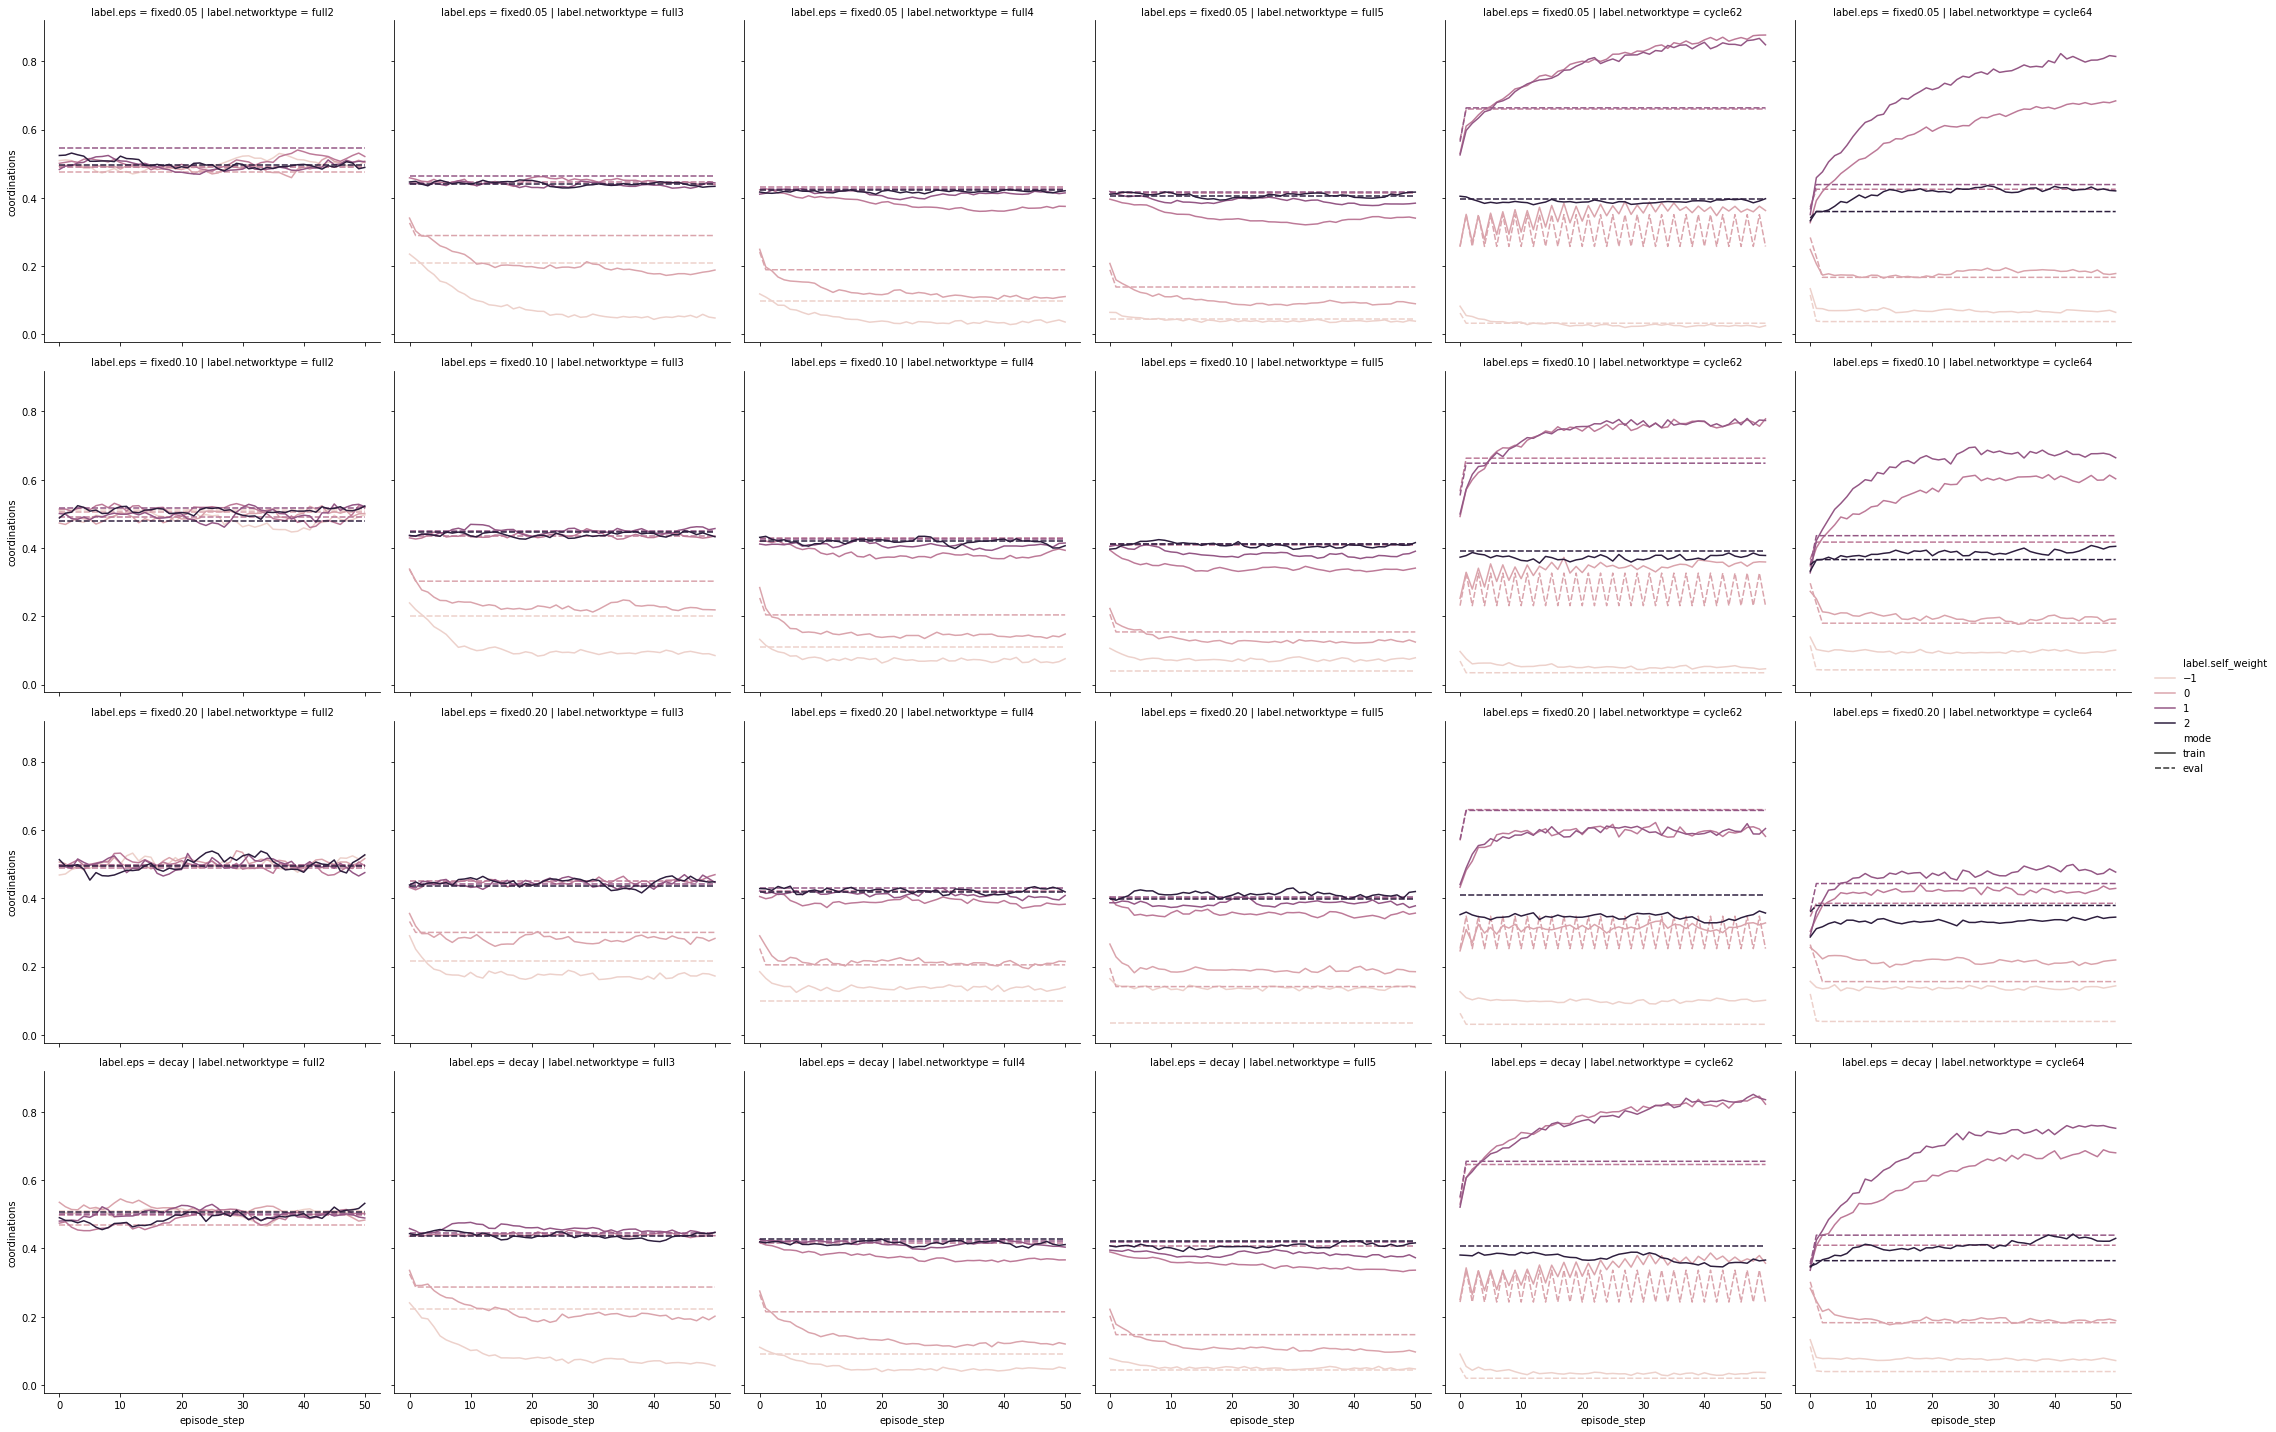

In [58]:
dfts = dft[(dft["agent_type"] == 'ci')]
sns.relplot(
    data=dfts, x='episode_step', y='coordinations', row='label.eps', style='mode', col="label.networktype",  
    hue="label.self_weight", kind="line", row_order=eps_order, col_order=networktype_order, ci=None)

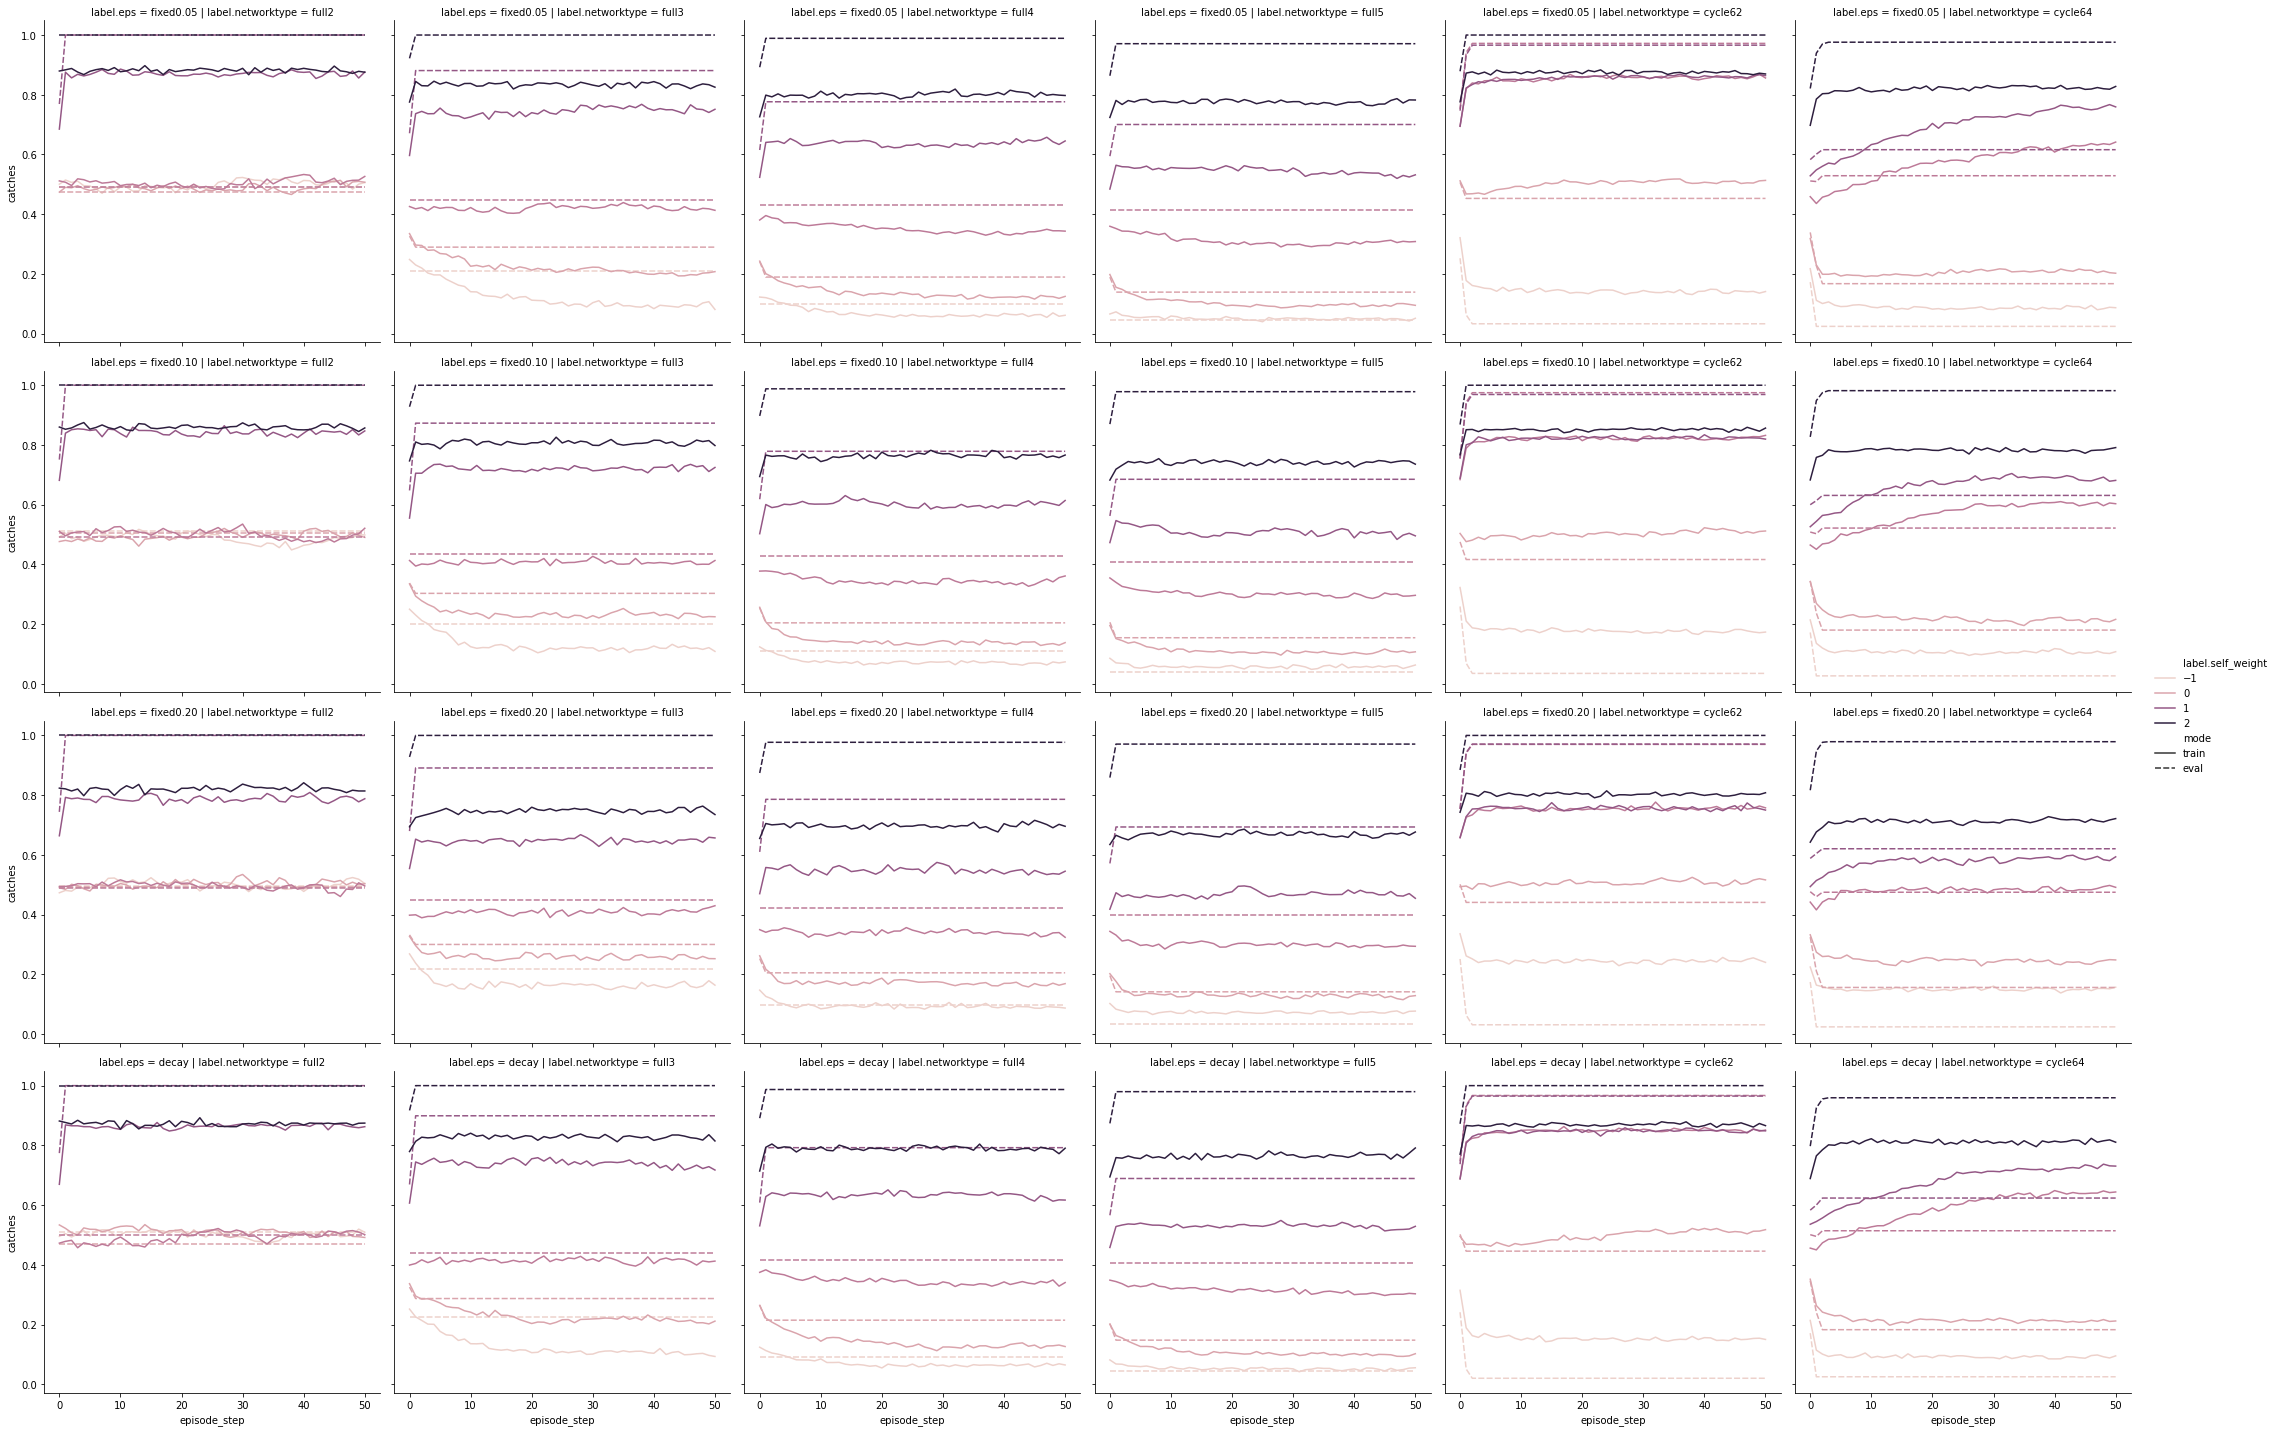

In [59]:
dfts = dft[(dft["agent_type"] == 'ai')]
sns.relplot(
    data=dfts, x='episode_step', y='catches', row='label.eps', style='mode', col="label.networktype",  
    hue="label.self_weight", kind="line", row_order=eps_order, col_order=networktype_order, ci=None)

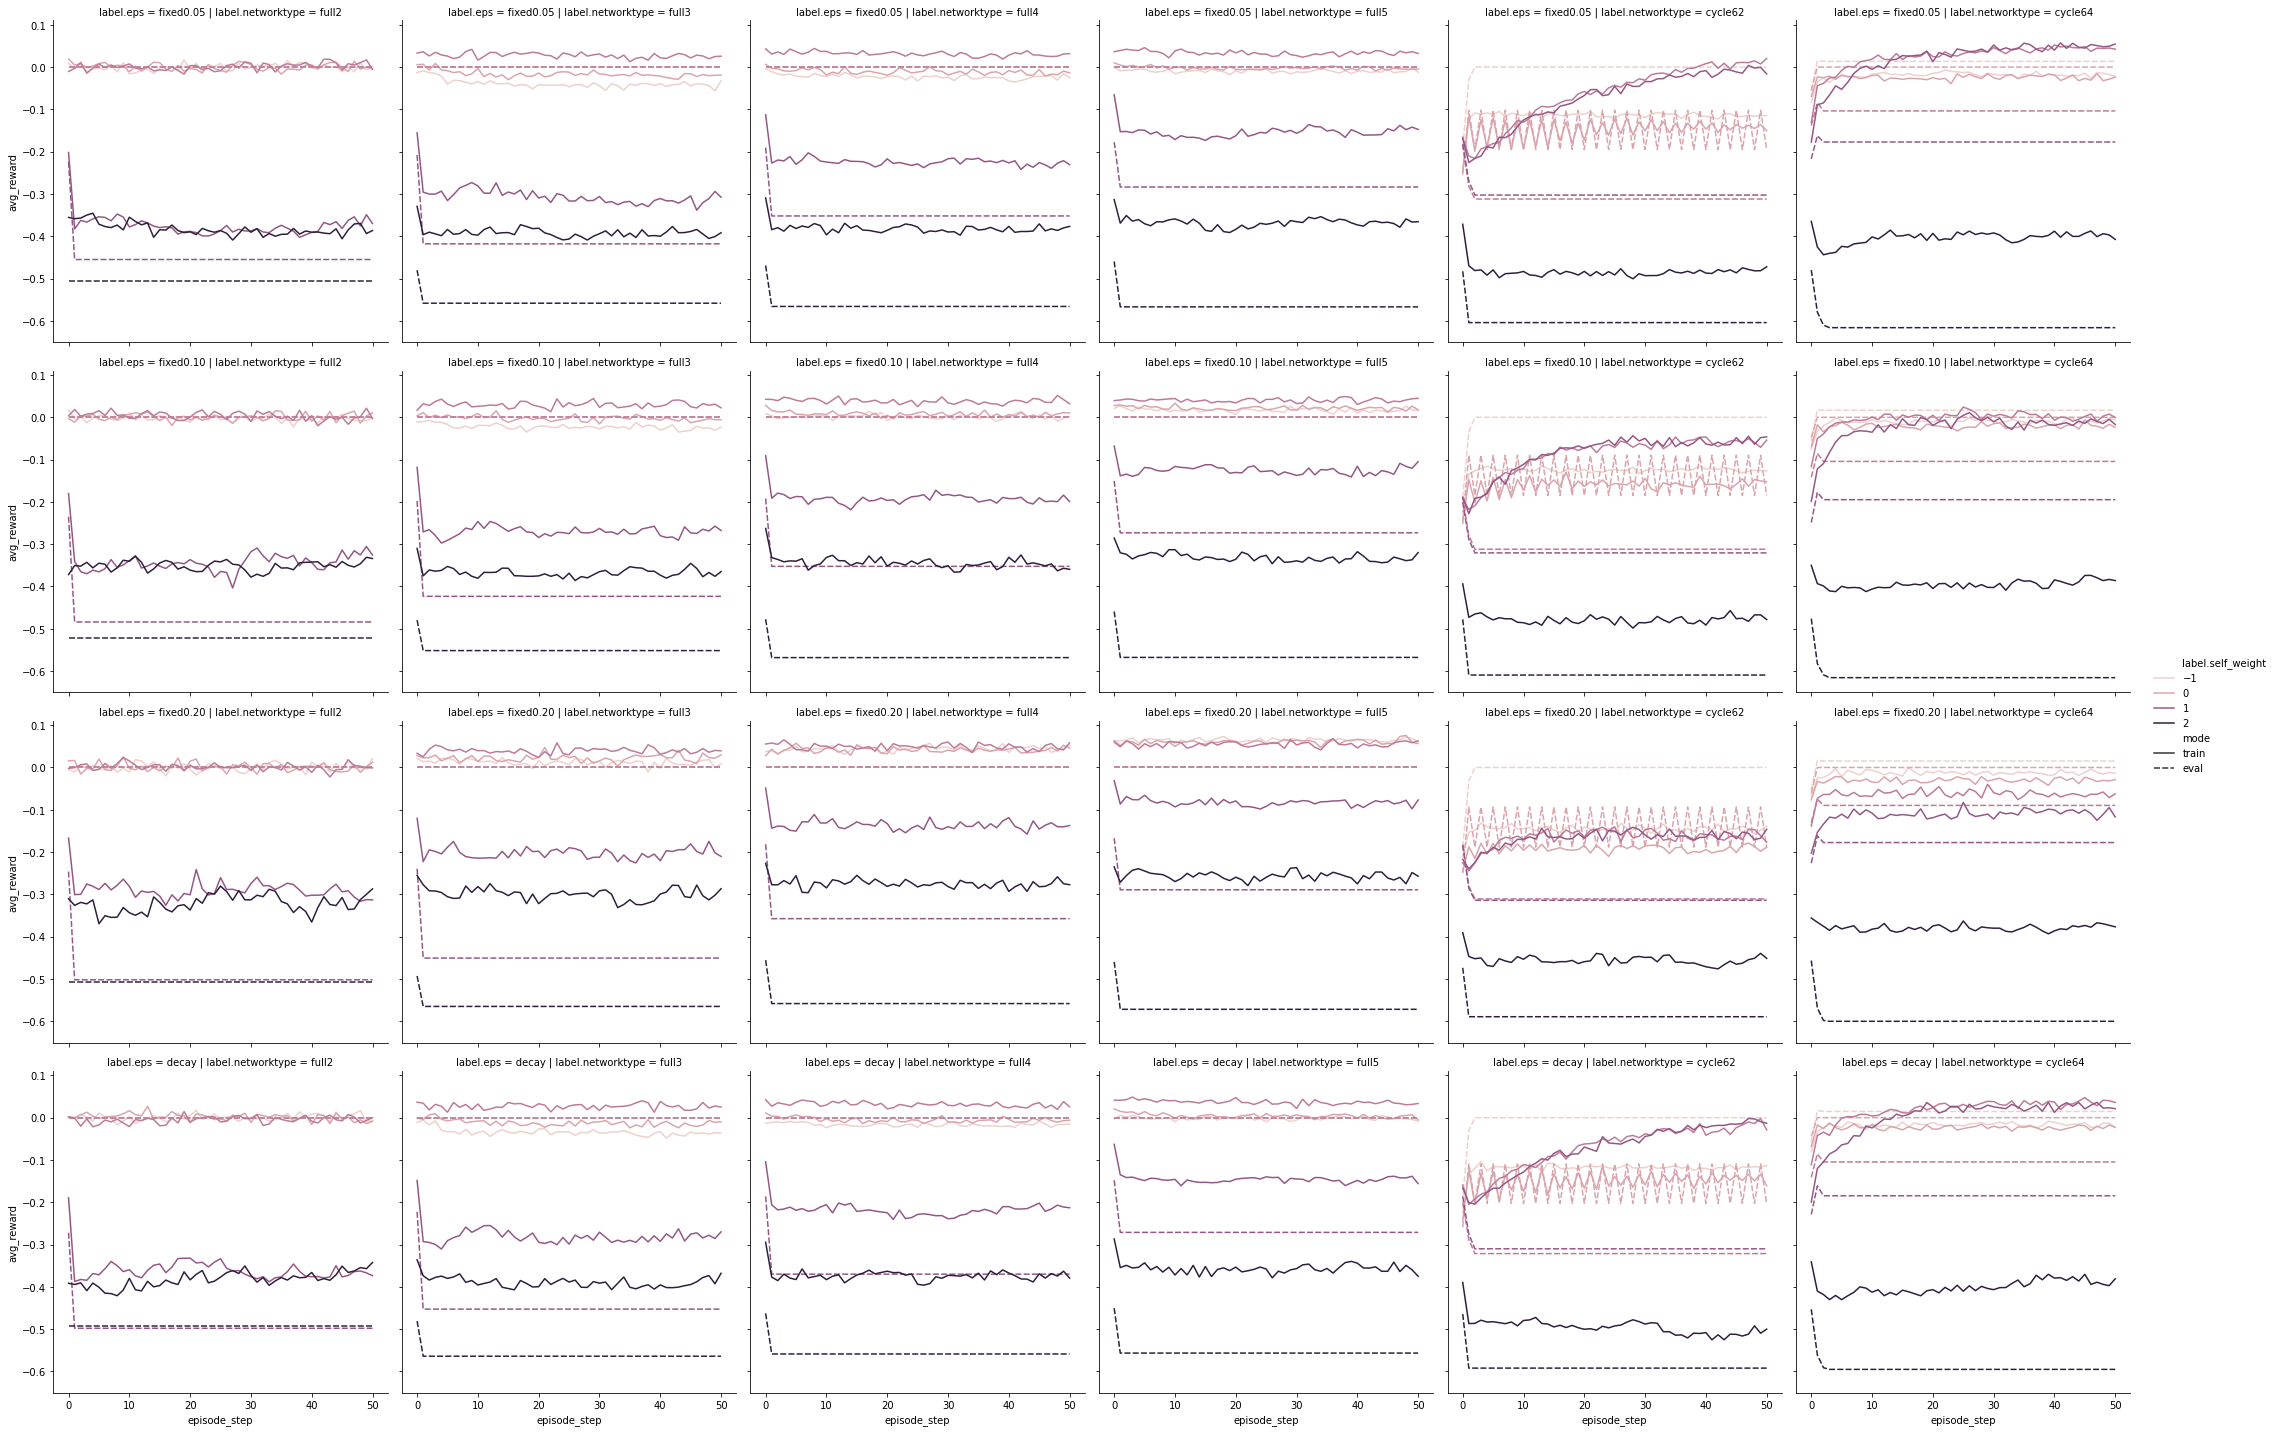

In [60]:
dfts = dft[(dft["agent_type"] == 'ci')]
sns.relplot(
    data=dfts, x='episode_step', y='avg_reward', row='label.eps', style='mode', col="label.networktype",  
    hue="label.self_weight", kind="line", row_order=eps_order, col_order=networktype_order, ci=None)

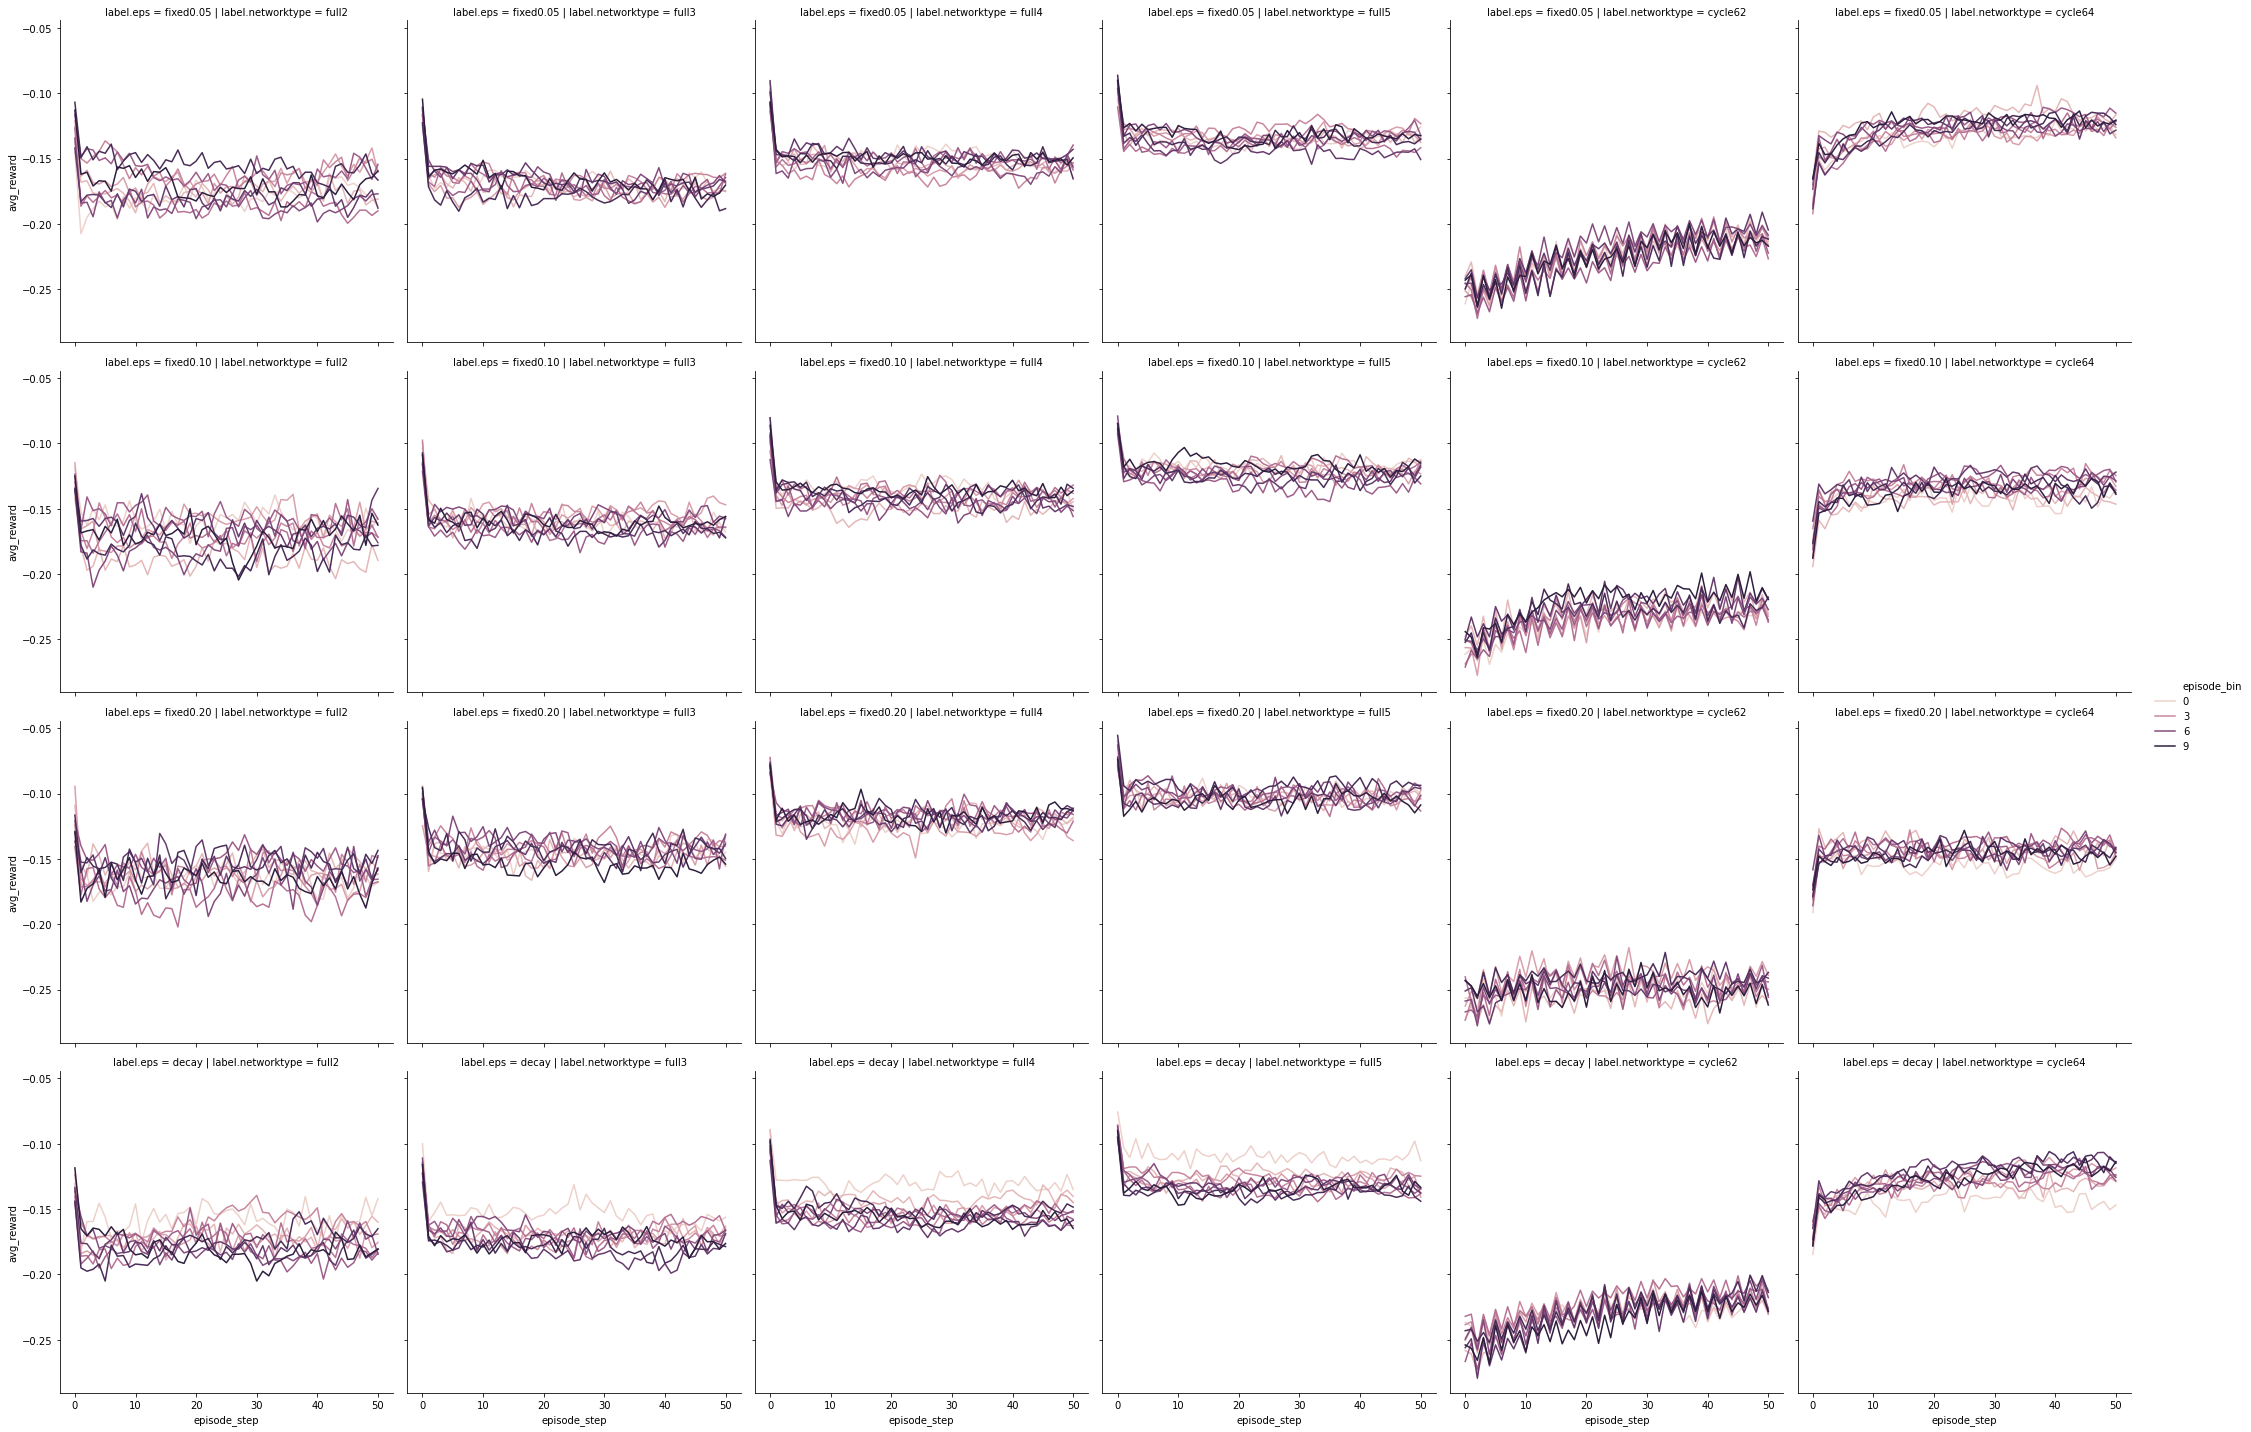

In [67]:
dfts = dft[(dft["agent_type"] == 'ci')]

dfts['episode_bin'] = dfts['episode'] // ((dfts['episode'].max() + 1) // 10)
dftss = dfts[(dfts['label.self_weight'] == 1) & (dfts['mode'] == 'train')]

sns.relplot(
    data=dfts, x='episode_step', y='avg_reward', row='label.eps', col="label.networktype",  
    hue="episode_bin", kind="line", row_order=eps_order, col_order=networktype_order, ci=None)

to be done: individual agent rewards